# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Importing the dataset


In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
dataset = pd.concat([dataset.drop('Genre', axis=1), pd.get_dummies(dataset['Genre'], drop_first=True)], axis=1)
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [4]:
X = dataset.iloc[:, :].values
X

array([[  1,  19,  15,  39,   1],
       [  2,  21,  15,  81,   1],
       [  3,  20,  16,   6,   0],
       [  4,  23,  16,  77,   0],
       [  5,  31,  17,  40,   0],
       [  6,  22,  17,  76,   0],
       [  7,  35,  18,   6,   0],
       [  8,  23,  18,  94,   0],
       [  9,  64,  19,   3,   1],
       [ 10,  30,  19,  72,   0],
       [ 11,  67,  19,  14,   1],
       [ 12,  35,  19,  99,   0],
       [ 13,  58,  20,  15,   0],
       [ 14,  24,  20,  77,   0],
       [ 15,  37,  20,  13,   1],
       [ 16,  22,  20,  79,   1],
       [ 17,  35,  21,  35,   0],
       [ 18,  20,  21,  66,   1],
       [ 19,  52,  23,  29,   1],
       [ 20,  35,  23,  98,   0],
       [ 21,  35,  24,  35,   1],
       [ 22,  25,  24,  73,   1],
       [ 23,  46,  25,   5,   0],
       [ 24,  31,  25,  73,   1],
       [ 25,  54,  28,  14,   0],
       [ 26,  29,  28,  82,   1],
       [ 27,  45,  28,  32,   0],
       [ 28,  35,  28,  61,   1],
       [ 29,  40,  29,  31,   0],
       [ 30,  

## Using the elbow method to find the optimal number of clusters

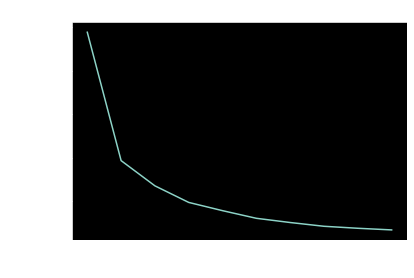

In [5]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Fitting kmeans to dataset


In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=2)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[ 40.45238095,  46.85714286,  35.47619048,  35.11904762,
          0.38095238],
       [ 96.01694915,  41.55932203,  59.05084746,  49.03389831,
          0.42372881],
       [164.        ,  40.80555556,  87.91666667,  17.88888889,
          0.52777778],
       [162.        ,  32.69230769,  86.53846154,  82.12820513,
          0.46153846],
       [ 21.41666667,  25.25      ,  24.91666667,  76.04166667,
          0.41666667]])

## Visualizing the clusters


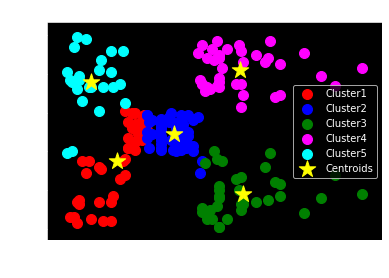

In [9]:
colors = ['red', 'blue', 'green', 'magenta', 'cyan']
for i in range(0, 5):
    plt.scatter(X[y_kmeans == i, 2], X[y_kmeans == i, 3], s=100, c=colors[i], label='Cluster'+str(i+1))

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

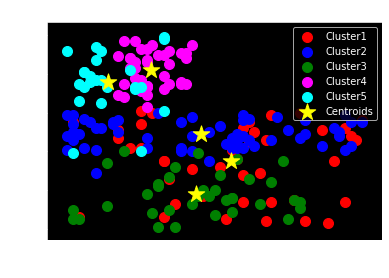

In [10]:
for i in range(0, 5):
    plt.scatter(X[y_kmeans == i, 1], X[y_kmeans == i, 3], s=100, c=colors[i], label='Cluster'+str(i+1))

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

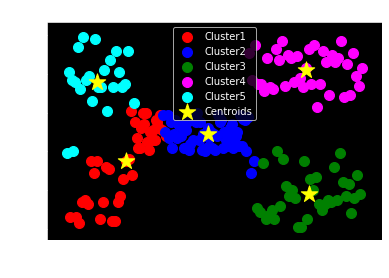

In [11]:
for i in range(0, 5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 3], s=100, c=colors[i], label='Cluster'+str(i+1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Customer Id')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()